In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pickle
import tensorflow.keras.utils as keras_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

In [ ]:
# Set the path to the dataset directory
dataset_path = os.path.join('/content/drive/MyDrive/Capstone Project/Batik_DataSet_V2_Ver1')

img_size = 224
batch_size = 80

In [ ]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

In [ ]:
# Data normalization for the validation set
#val_datagen = ImageDataGenerator(
#    rescale=1./255)
    

In [ ]:
# Load and preprocess the training set
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    shuffle=True,
    class_mode='categorical',
    subset='training')

# Load and preprocess the validation set
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 4664 images belonging to 20 classes.
Found 1163 images belonging to 20 classes.


In [ ]:
# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Build the model architecture by adding the pre-trained base model and the top layers
model = tf.keras.models.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                                 
Total params: 27,570,516
Trainable params: 12,855,828
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Set the training parameters
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.00001), 
              metrics=['accuracy'])

In [ ]:
train_steps = train_generator.samples // train_generator.batch_size
val_steps = val_generator.samples // val_generator.batch_size

# Train the model using the training generator and validate it using the validation generator
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=train_steps,
                    validation_data=val_generator,
                    verbose=1,
                    validation_steps=val_steps)

Epoch 1/100
145/145 [==============================] - 3432s 24s/step - loss: 3.0337 - accuracy: 0.1099 - val_loss: 2.6580 - val_accuracy: 0.2457
Epoch 2/100
145/145 [==============================] - 3373s 23s/step - loss: 2.6572 - accuracy: 0.2079 - val_loss: 2.4575 - val_accuracy: 0.3194
Epoch 3/100
145/145 [==============================] - 3367s 23s/step - loss: 2.4746 - accuracy: 0.2684 - val_loss: 2.2983 - val_accuracy: 0.3620
Epoch 4/100
145/145 [==============================] - 3398s 23s/step - loss: 2.3249 - accuracy: 0.3120 - val_loss: 2.1683 - val_accuracy: 0.3958
Epoch 5/100
145/145 [==============================] - 3380s 23s/step - loss: 2.2323 - accuracy: 0.3374 - val_loss: 2.0705 - val_accuracy: 0.4193
Epoch 6/100
145/145 [==============================] - 3386s 23s/step - loss: 2.1328 - accuracy: 0.3722 - val_loss: 1.9917 - val_accuracy: 0.4418
Epoch 7/100
145/145 [==============================] - 3387s 23s/step - loss: 2.0589 - accuracy: 0.3942 - val_loss: 1.9291 -

In [ ]:
# Save the training history to a file
history_path = '/content/drive/MyDrive/Capstone Project/savedModelV2/training_history_v20_3_WIM_E100.pickle'

with open(history_path, 'wb') as file:
    pickle.dump(history.history, file)

# Save the trained model
model_path = '/content/drive/MyDrive/Capstone Project/savedModelV2/training_history_v20_3_WIM_E100.h5'
model.save(model_path)

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Capstone Project/savedModelV2/training_history_v20_3_WIM_E100.h5'

# Load the saved model
loaded_model = load_model(model_path)


In [ ]:
# Plot the model architecture
keras_utils.plot_model(loaded_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

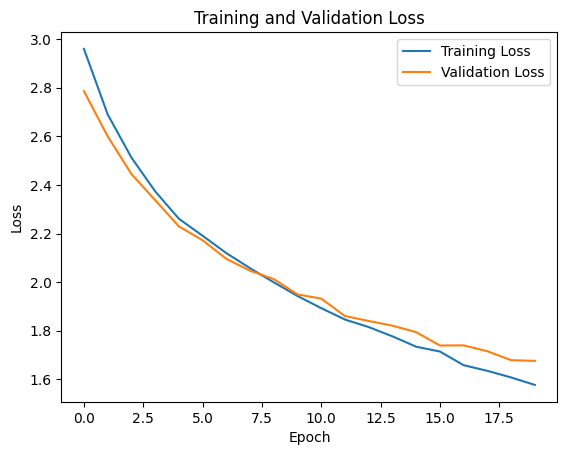

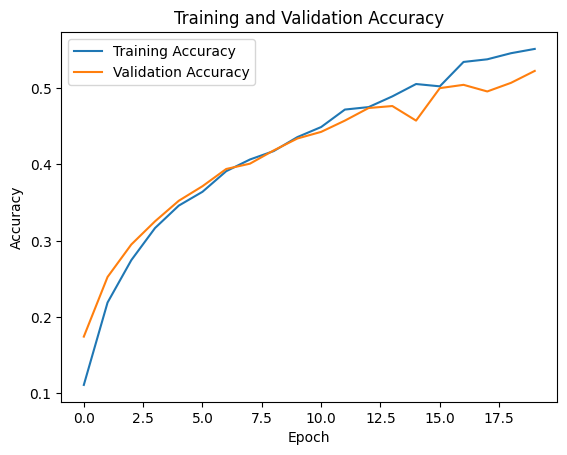

In [ ]:
import matplotlib.pyplot as plt

# Load the training history from the saved file
history_path = '/content/drive/MyDrive/Capstone Project/savedModelV2/training_history_v20_1_WIM.pickle'

with open(history_path, 'rb') as file:
    history = pickle.load(file)

# Plot the training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
